## Example of networks
In this notebook, I will give a few examples of networks. Some of them are generated by theoretical models, while the last one is a real social network on Facebook.

In [4]:
%matplotlib inline

from numpy import sqrt, log
from numpy import random
import networkx as nx
import matplotlib.pyplot as plt
import re
import community

def get_deg_dist(g):
    """
    @summary: Function for plotting the degree distribution of the network
    @param g: The network
    @return: None
    """
    degrees = g.degree(g.nodes())
    num_nodes = len(g.nodes())
    deg_dist, cum_deg_dist = {}, {}
    for deg in degrees.values():
        if not deg in deg_dist:
            deg_dist[deg] = 0
        deg_dist[deg] += 1
    degs = deg_dist.keys()
    degs.sort()
    for deg in degs:
        smaller = num_nodes
        for deg2 in degs:
            if deg2 < deg:
                smaller -= deg_dist[deg2]
        cum_deg_dist[deg] = smaller * 1. / num_nodes
    
    return cum_deg_dist


### Random network (Erdos-Renyi model)
For a network with $n$ nodes, each of the $\binom{n}{2}$ possible edges will appear with probability $p$.
The degree distribution is a binomial distribution:
$$P(k) = \binom{n-1}{k} p^k (1-p)^{n-1-k}$$

For $n \rightarrow \infty$ and $np = $ const, this distribution will approach Poisson distribution:
$$P(k) = \frac{(np)^k e^{-np}}{k!}$$



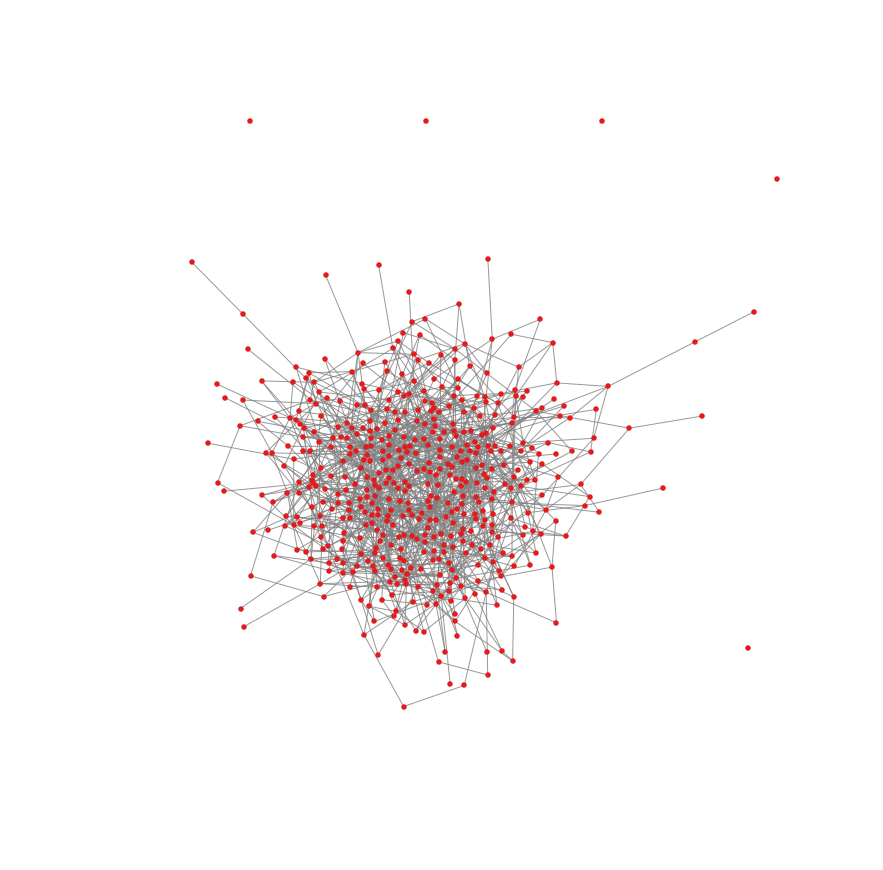

In [71]:
g = nx.gnp_random_graph(500, 0.01)
# Generate the graph layout
pos = nx.graphviz_layout(g, prog='sfdp')
plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(g, pos, node_size=30, node_color='#e41a1c', linewidths=0)
nx.draw_networkx_edges(g, pos, edge_color='grey', alpha=0.8)
plt.axis('off')
plt.show()

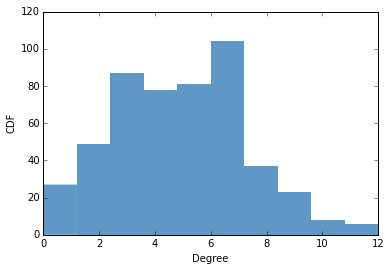

In [72]:
degrees = g.degree(g.nodes())
plt.xlabel('Degree')
plt.ylabel('PDF')
plt.hist(degrees.values(), color='#377eb8', alpha=0.8, linewidth=0)
plt.show()

### Small world network (Watts-Strogatz model)

Rewire each link within a lattice with probability $p$.

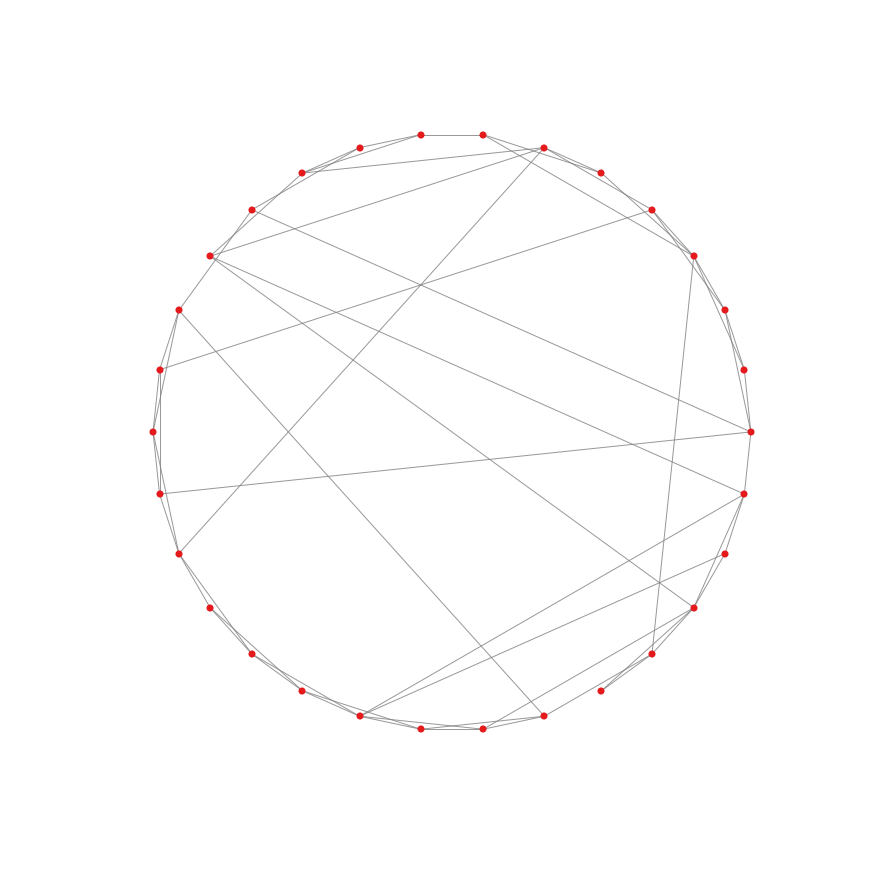

In [5]:
g = nx.watts_strogatz_graph(30, 4, 0.2)
pos = nx.circular_layout(g)
plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(g, pos, node_size=50, node_color='#e41a1c', linewidths=0)
nx.draw_networkx_edges(g, pos, edge_color='grey', alpha=0.8)
plt.axis('off')
plt.show()

### Scale-free network (Barabasi-Albert model)
The degree distribution is a power-law distribution,
$$P(k) \sim k^{-\gamma}$$

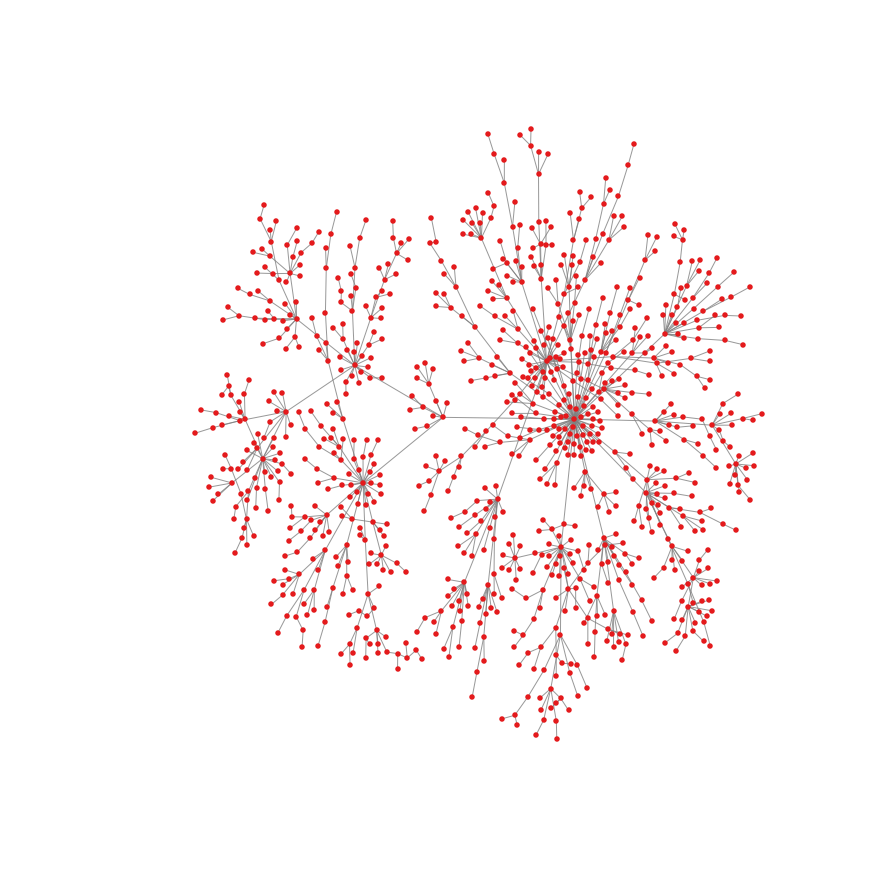

In [29]:
g = nx.barabasi_albert_graph(1000, 1)
# Generate the graph layout
pos = nx.graphviz_layout(g, prog='sfdp')
plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(g, pos, node_size=30, node_color='#e41a1c', linewidths=0)
nx.draw_networkx_edges(g, pos, edge_color='grey', alpha=0.8)
plt.axis('off')
plt.show()

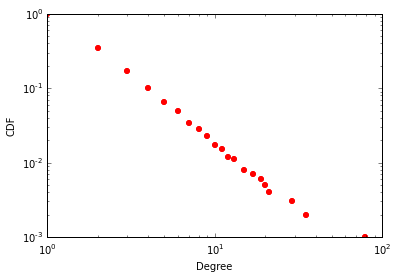

In [30]:
cum_deg_dist = get_deg_dist(g)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('CDF')
plt.plot(cum_deg_dist.keys(), cum_deg_dist.values(), 'ro', markeredgecolor='none')
plt.show()

###A real network: Han's social network on Facebook

In [74]:
g = nx.read_gml("han-network.gml", relabel=True)

In [75]:
g = max(nx.connected_component_subgraphs(g), key=len)
print "Generated giant component"
print "Diameter:", nx.diameter(g)
print "Avg. clustering coefficient:", nx.average_clustering(g)

Generated giant component
Diameter: 6
Avg. clustering coefficient: 0.547903374831


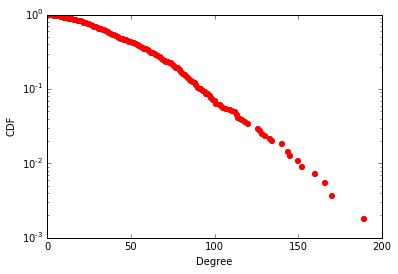

In [77]:
cum_deg_dist = get_deg_dist(g)
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('CDF')
plt.plot(cum_deg_dist.keys(), cum_deg_dist.values(), 'ro', markeredgecolor='none')
plt.savefig('han_facebook_deg_dist.jpeg', dpi=300)
plt.show()

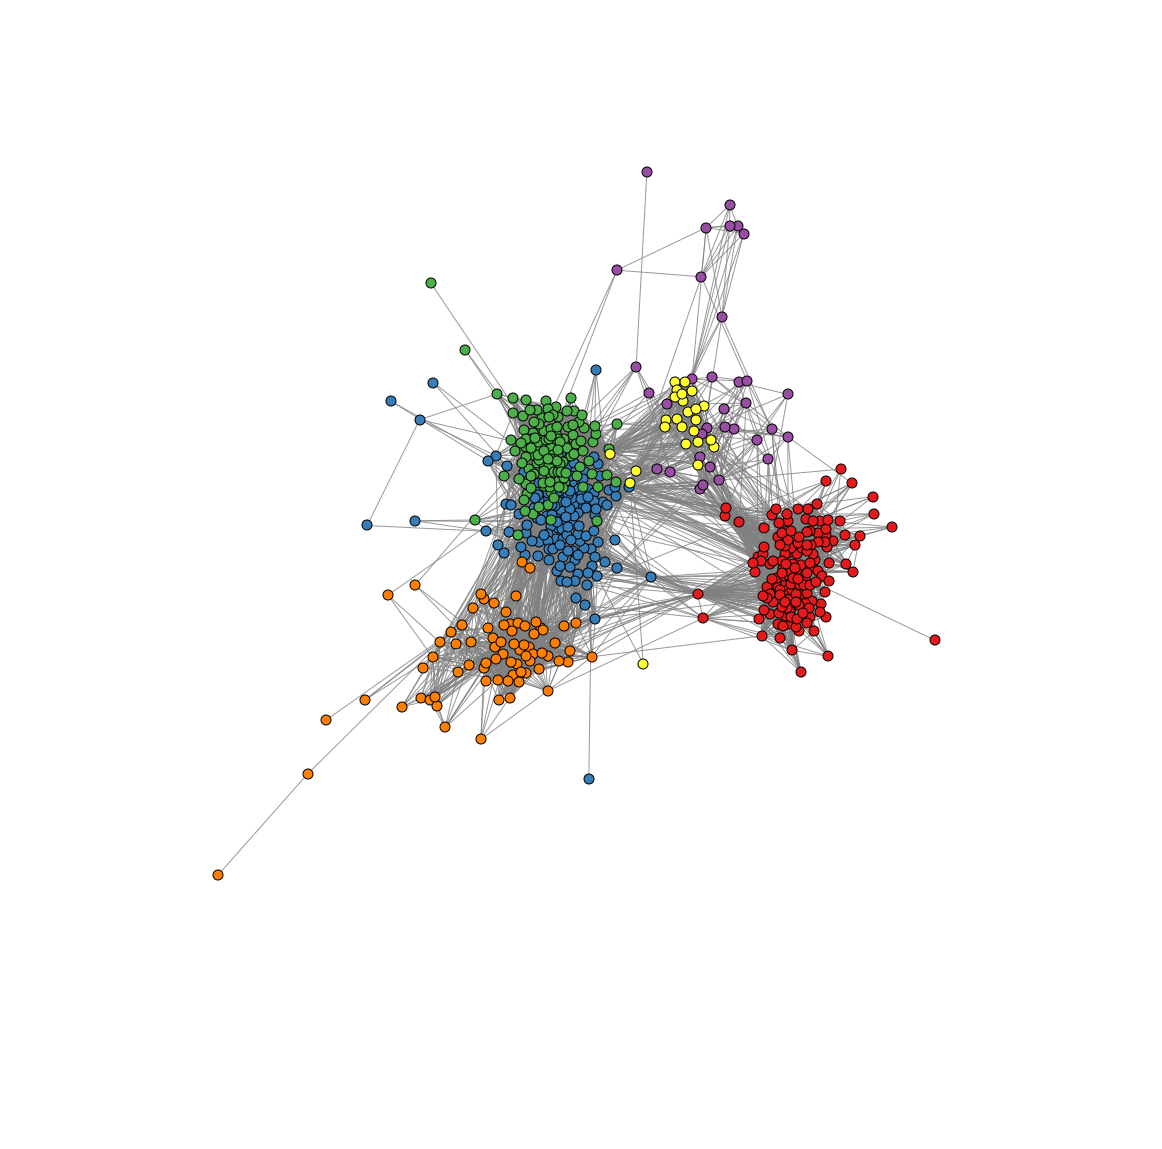

In [88]:
plt.figure(figsize=(20, 20))

pos = nx.graphviz_layout(g, prog='sfdp')
partition = community.best_partition(g)

# Colors from colorbrewer2.org
part_colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3',
               '#ff7f00', '#ffff33', '#a65628', '#f781bf', '#999999']
count = 0
for com in set(partition.values()) :
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    sizes = []
    for node in list_nodes:
        sizes.append(30 * sqrt(g.degree(node)))
    if count <= 7:
        color = part_colors[count]
    else:
        color = random.rand(3, 1)
    nx.draw_networkx_nodes(g, pos, list_nodes, node_size=100,
                           node_color=color, alpha=1, linewidths=1)
    count = count + 1

nx.draw_networkx_edges(g, pos, edge_color='grey', alpha=0.8)
plt.axis('off')
plt.savefig('han_facebook.jpeg', facecolor='black', dpi=300)
plt.show()